# Earthquake Data Analysis

### Description

The catalog includes the magnitude, time of occurrence (s), and 3D coordinates (m) of earthquakes in about 20 years of recording in South California. Coordinates were converted from latitude, longitude, and depth of events in a seismic catalog. Magnitudes should be within the range $[0,8]$.

* **Waiting time (t)**: time interval between an event and the next one in the sequence.
* **Distance (r)**: Eucledian 3D distance between events. (each 3D set of coordinates refers to the hypocenter, i.e. the point triggering the slip in a fault that forms the earthquake)


### Assignments

1. Deduce what is the variable in each column of the catalog.
2. Visualize the process in space and/or time with suitable time series and/or 3D visualizations of the hypocenters. For instance, plot a space variable (a single coordinate or a nice linear combination of coordinates) as a function of time.
3. Compute the distribution $P_m(t)$ of waiting times for events of magnitude m or above (i.e. do not consider events below $m$). In shaping the bin sizes, take into account that this distribution is expected to have a power-law decay with time (e.g $\sim 1/t$), and that a power-law is well visualized in log-log scale. Do this analysis for many values of $m$, say $m=2,3,4,5$.
4. Compute the distribution $P_m(r)$ of the distance between an event and the next one, considering earthquakes of magnitude m or above. Also here make a clever choice for the bin sizes and try several values of $m$.
5. Compute the distribution $P_{m,R}(t)$ of waiting times for events of magnitude $m$ or above, which are separated by at most a distance $r<R$, for different values of m and $R$. (In this statistics, if the following event is farther than $R$, skip the $t$ and go to the next pair)
6. Eventually note if, from the analysis of the previous points, there emerges a scaling picture. Is there a suitable rescaling that collapses distributions for various $m$ (and eventually $R$ if point 5 is considered) on a single curve?

### Datasets

* column 1: index of the event
* column 2: index of the previous event that triggered it (defined with a given algorithm), -1 if no ancestor is found
* column 3: time (seconds) from 0:00 of Jan.1st, 1982
* column 4: magnitude
* columns 5, 6, and 7: 3D coordinates (meters) of the earthquake hypocenter, i.e. of the point from where it started. These Euclidean coordinates are derived from latitude, longitude and depth.

Joining each event to that with the index of the second column (if not -1), there emerges a set of causal trees.


### Contact
* Marco Baiesi <marco.baiesi@unipd.it>

In [2]:
import pandas as pd

data = 'SouthCalifornia-1982-2011_Physics-of-Data.dat'


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')
#filepath = '/content/drive/MyDrive/LCP_project/'

In [4]:
#df = pd.read_csv(filepath + data, sep = ' ', names = ['Index', 'Prev event', 'Time', 'Magnitude', 'x', 'y', 'z'])
df = pd.read_csv(data, sep = ' ', names = ['Index', 'Prev_event', 'Time', 'Magnitude', 'x', 'y', 'z'])

df.head(5)

,Index,Prev_event,Time,Magnitude,x,y,z
0,0,-1,0.00000,2.71,-2571956,-4627162,3520602
1,1,0,36501.39072,2.12,-2363740,-4787011,3461373
2,2,0,37488.27744,2.33,-2363746,-4786942,3461232
3,3,0,47982.51648,2.57,-2475085,-4664024,3548479
4,4,0,60268.57056,2.98,-2238642,-4839098,3469546


In [5]:
df.tail(5)
df

,Index,Prev_event,Time,Magnitude,x,y,z
0,0,-1,0.000000e+00,2.71,-2571956,-4627162,3520602
1,1,0,3.650139e+04,2.12,-2363740,-4787011,3461373
2,2,0,3.748828e+04,2.33,-2363746,-4786942,3461232
3,3,0,4.798252e+04,2.57,-2475085,-4664024,3548479
4,4,0,6.026857e+04,2.98,-2238642,-4839098,3469546
...,...,...,...,...,...,...,...
110266,110266,-1,9.304996e+08,2.60,-2668492,-4335735,3810743
110267,110267,-1,9.305115e+08,2.02,-2297480,-4823870,3445285
110268,110268,-1,9.305318e+08,2.00,-2404797,-4441247,3868121
110269,110269,-1,9.305363e+08,2.17,-2388375,-4691191,3550903


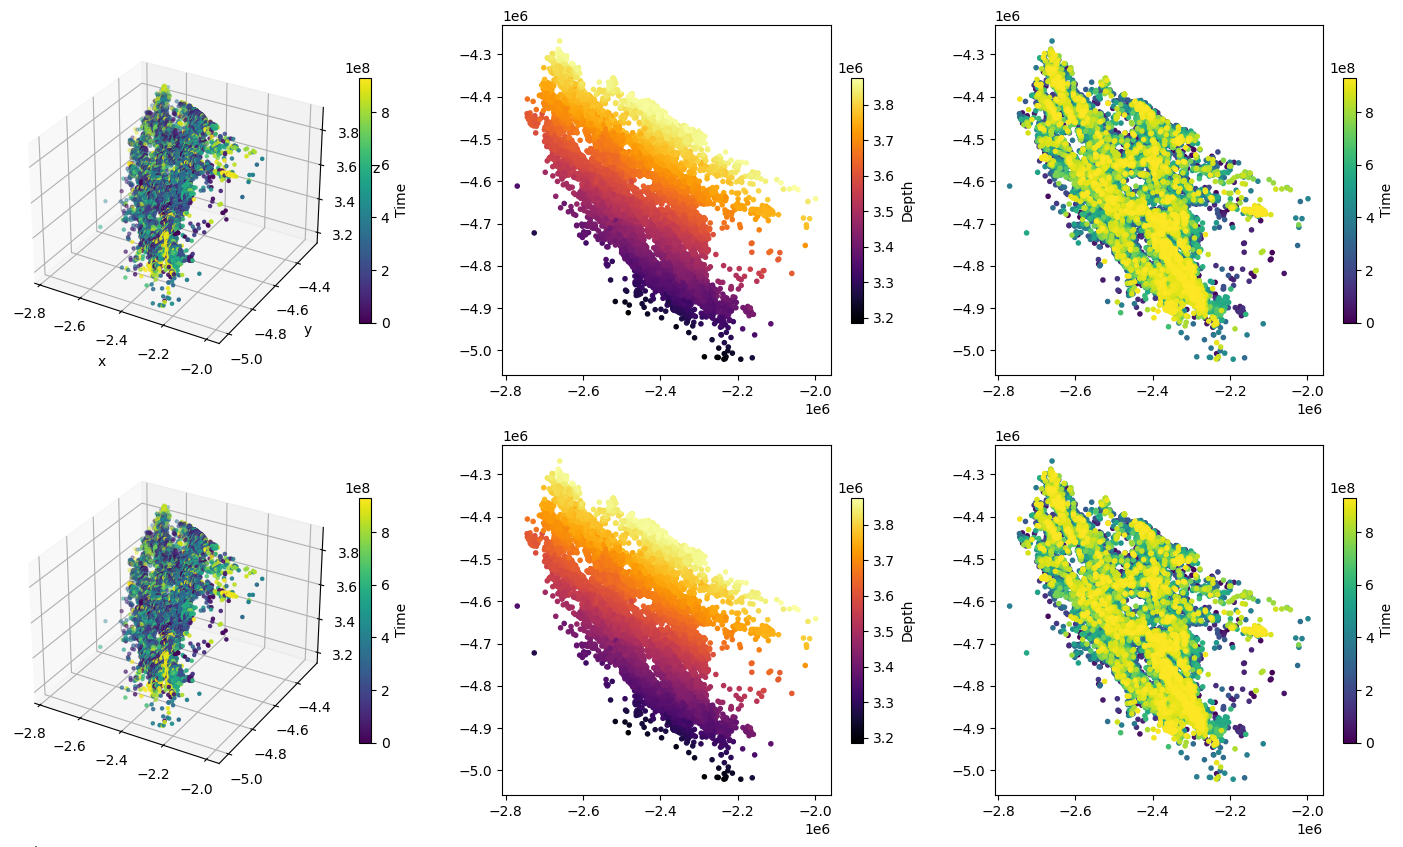

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(18,10))

ax1 = fig.add_subplot(2, 3, 1, projection='3d')
scatter1 = ax1.scatter(df['x'], df['y'], df['z'], c=df['Time'], cmap='viridis', marker='.')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
fig.colorbar(scatter1, label='Time', shrink=0.7)

ax2 = fig.add_subplot(2, 3, 2)
scatter2 = ax2.scatter(df['x'], df['y'], c=df['z'], cmap='inferno', marker='.')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
fig.colorbar(scatter2, label='Depth', shrink=0.7)

ax3 = fig.add_subplot(2, 3, 3)
scatter3 = ax3.scatter(df['x'], df['y'], c=df['Time'], cmap='viridis', marker='.')
fig.colorbar(scatter3, label='Time', shrink=0.7)

ax4 = fig.add_subplot(2, 3, 4, projection='3d')
scatter4 = ax4.scatter(df['x'], df['y'], df['z'], c=df['Time'], cmap='viridis', marker='.')
fig.colorbar(scatter4, label='Time', shrink=0.7)

ax5 = fig.add_subplot(2, 3, 5)
scatter5 = ax5.scatter(df['x'], df['y'], c=df['z'], cmap='inferno', marker='.')
fig.colorbar(scatter5, label='Depth', shrink=0.7)

ax6 = fig.add_subplot(2, 3, 6)
scatter6 = ax6.scatter(df['x'], df['y'], c=df['Time'], cmap='viridis', marker='.')
fig.colorbar(scatter6, label='Time', shrink=0.7)

# andamento chiaro della dipendenza della depth da longitude e latitude, inefficacia del primo plot perchè non c'è una
# dipendenza temporale definita dalla posizione dell'ipocentro

In [10]:
print(df[['x', 'y', 'z']])

              x        y        z
0      -2571956 -4627162  3520602
1      -2363740 -4787011  3461373
2      -2363746 -4786942  3461232
3      -2475085 -4664024  3548479
4      -2238642 -4839098  3469546
...         ...      ...      ...
110266 -2668492 -4335735  3810743
110267 -2297480 -4823870  3445285
110268 -2404797 -4441247  3868121
110269 -2388375 -4691191  3550903
110270 -2579453 -4409462  3774036

[110271 rows x 3 columns]


1e-06 1073457.6883200034
1e-06 1073457.6883200034
1e-06 1921644.8553600311
1e-06 1921644.8553600311
1.2095999717712402 12434720.35680002
1.2095999717712402 12434720.35680002
30.369599997997284 55206605.31551993
30.369599997997284 55206605.31551993


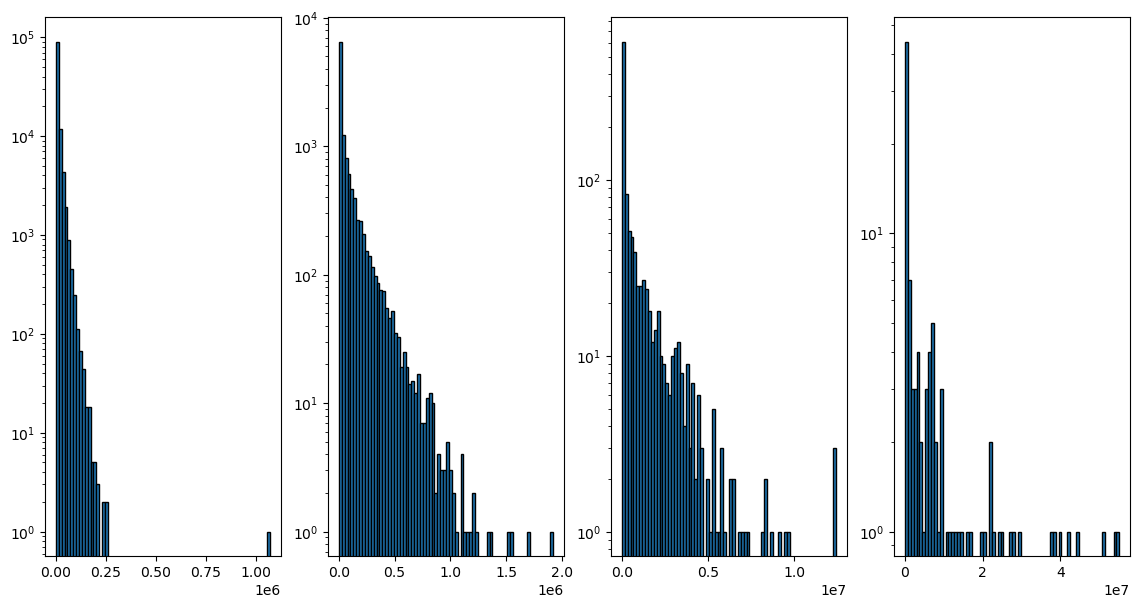

In [75]:
import numpy as np

m = [2, 3, 4, 5]

fig, ax = plt.subplots(1, 4, figsize = (14,7))
#print(df)
for j, i in enumerate(m):
      df2 = df[df['Magnitude'] >= i].sort_values(by = 'Time')
      #wt = df2['Waiting_time']
      #wt = [0]
      #print(df2['Index'])
      #for j in range(1, len(df2)):
            #print(j)            
            #wt.append(df2['Time'][j] -  df2['Time'][j-1])
      wt = np.diff(df2['Time'])
      wt[wt<1.e-5] = 1.e-6
      #x = np.logspace(np.log10(np.min(wt)), np.log10(np.max(wt)), 50)
      x = np.linspace(np.min(wt), np.max(wt), 75)
      print(np.min(x), np.max(x))
      print(np.min(wt), np.max(wt))
      #x = np.linspace(0, df2['Time'].max(), 50)
      #df2['Waiting_= wt
      
      ax[j].hist(wt, bins = x, edgecolor = 'black')
      #ax[j].plot(x, 1/x)
      #ax[j].plot(x, 1/np.sqrt(x))
      #ax[j].plot(x, 1/(x ** (3/2)))
      #ax[j].set_xscale('log', base = 10)
      ax[j].set_yscale('log', base = 10)
      
plt.show()

(110270,)
(11922,)
(1132,)
(108,)


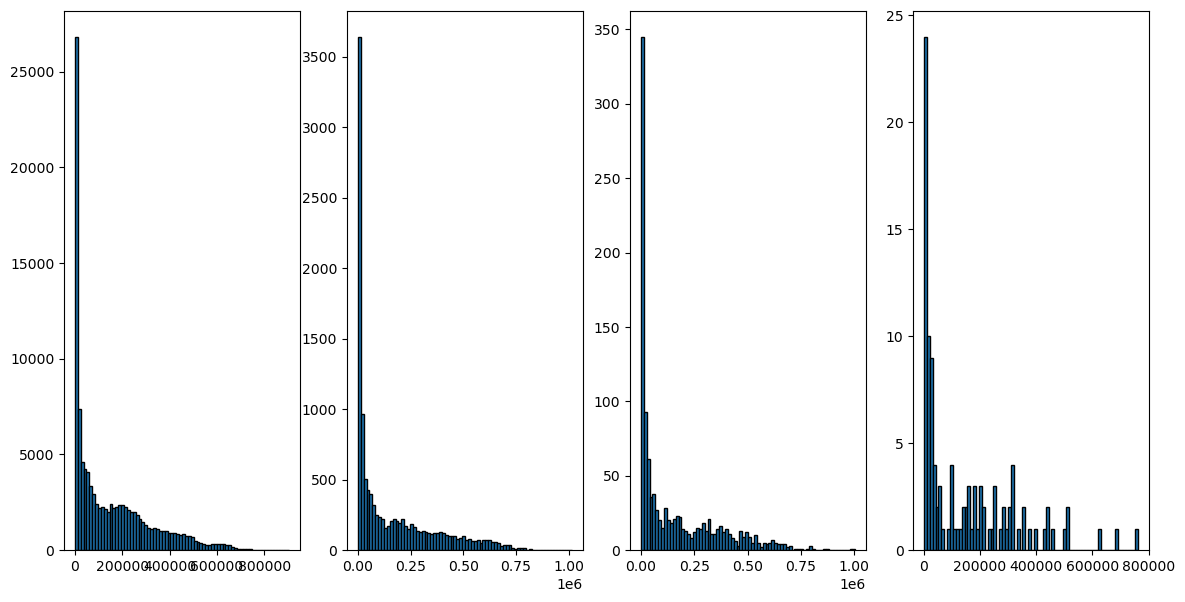

In [80]:
#np.linalg.norm(x2-x1)

fig, ax = plt.subplots(1, 4, figsize = (14,7))

for j, i in enumerate(m):
      
      df2 = df[df['Magnitude'] >= i][['x', 'y', 'z']]
      coordinates = df2.to_numpy()
      dd = np.linalg.norm(np.diff(coordinates, axis = 0), axis = 1)
      print(dd.shape)
      
      #x = np.logspace(np.log10(np.min(wt)), np.log10(np.max(wt)), 50)
      x = np.linspace(np.min(dd), np.max(dd), 75)
      ax[j].hist(dd, bins = x, edgecolor = 'black')
      #ax[j].set_xscale('log', base = 10)
      #ax[j].set_yscale('log', base = 10)
      
plt.show()

Data selected by magnitude:  2 \ R:  10000
Data selected by magnitude:  2 \ R:  100000
Data selected by magnitude:  2 \ R:  1000000
Data selected by magnitude:  3 \ R:  10000
Data selected by magnitude:  3 \ R:  100000
Data selected by magnitude:  3 \ R:  1000000
Data selected by magnitude:  4 \ R:  10000
Data selected by magnitude:  4 \ R:  100000
Data selected by magnitude:  4 \ R:  1000000
Data selected by magnitude:  5 \ R:  10000
Data selected by magnitude:  5 \ R:  100000
Data selected by magnitude:  5 \ R:  1000000


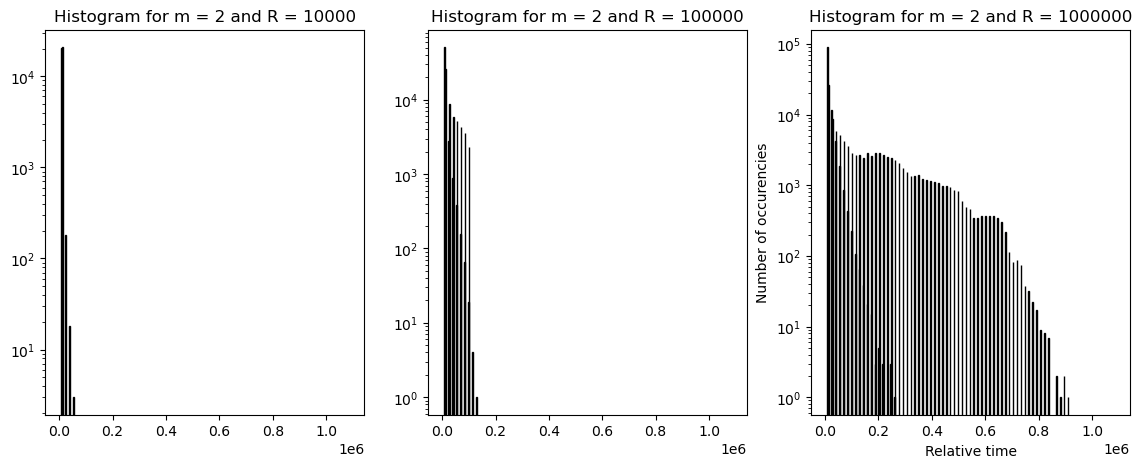

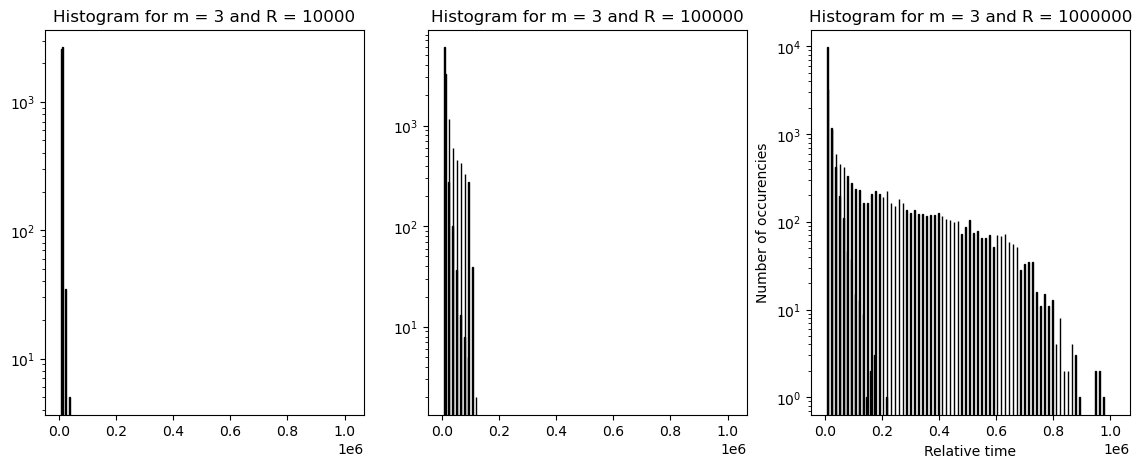

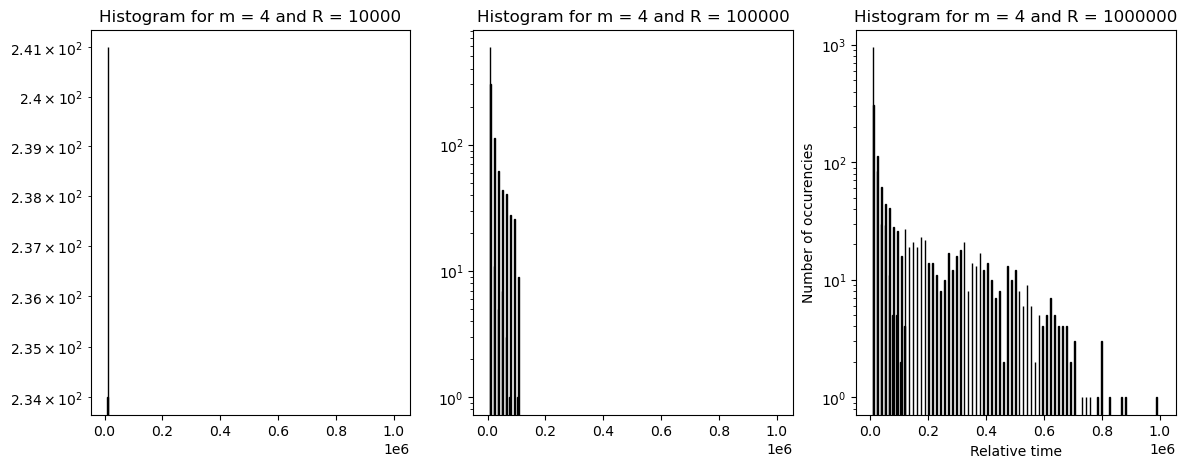

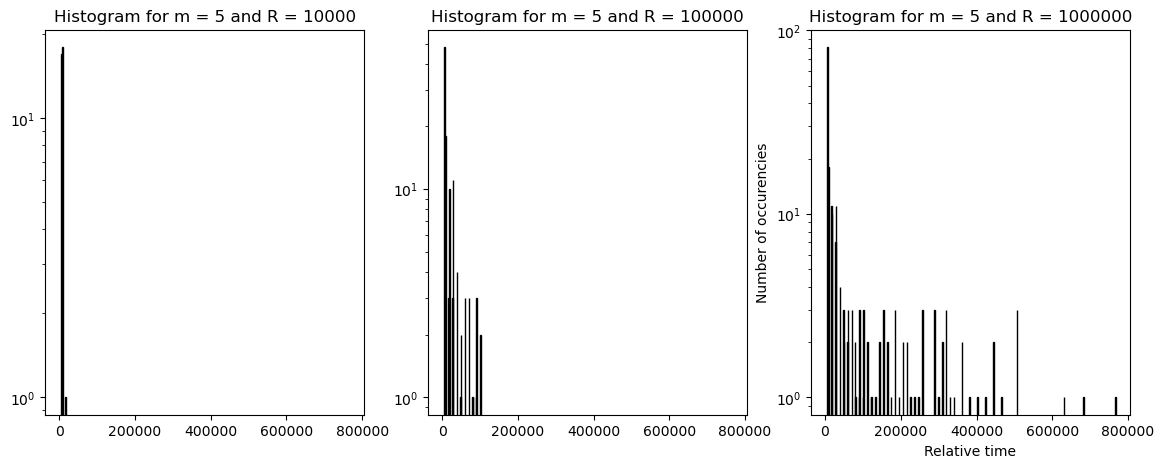

In [80]:
#Point 5, let's compute the distribution of waiting times for events 
m = [2, 3, 4, 5]
R = [10000, 100000, 1000000]


def get_Pmr(df, m, R): #m, R parameters given by the user
    #First let's calculate the relative time between events 
    wt = np.diff(df['Time'])
    wt = np.concatenate((np.array([0]), wt), axis = 0)
    df['Rel_time'] = wt

    #Select a magnitude 
    dfm = df[df['Magnitude']>= m][['x', 'y', 'z','Rel_time']] #first threshold, select by magnitude
    print('Data selected by magnitude: ', m, '\\ R: ', R)

    #Evaluate the distance between one event and the next one 
    coordinates = dfm.to_numpy()
    dd = np.linalg.norm(np.diff(coordinates, axis = 0), axis = 1)
    dd = np.concatenate((np.array([0]), dd), axis = 0)
    dfm['Rel_distance'] = dd
    dfmr = dfm[dfm['Rel_distance'] <= R] #select by distance 
    
    plt.xlabel('Relative time')
    plt.ylabel('Number of occurencies')
    plt.title(f'Histogram for m = {m} and R  = {R}')
    return dfmr, dd

for i, m_ in enumerate(m):
     index = 0
     fig, ax = plt.subplots(1, len(R), figsize = (14,5))
     for j, R_ in enumerate(R):
        dfmr, dd = get_Pmr(df, m_, R_)
        x = np.linspace(np.min(dd), np.max(dd), 75)
        ax[index].hist(dfmr, bins = x, edgecolor = 'black')
        ax[index].set_title(f'Histogram for m = {m_} and R = {R_}')
        ax[index].set_yscale('log', base = 10)
        index += 1
     #plt.subplots_adjust(wspace=0.4, hspace=1)
plt.show()